#Actividad Guiada 1 de Algoritmos de Optimizacion


Nombre: Wilson Henry Bello V.(Pon aqui tu nombre)

https://drive.google.com/drive/folders/1pXG7o4RtxqaONwFa3zGyzJCySFHfHJM9?usp=sharing (Pon aquí tu cuaderno)

https://github.com/whbello/Algoritmos-de-optimizaci-n.git (Pon aquí tu proyecto git)

1.   Elemento de lista
2.   Elemento de lista

#Torres de Hanoi - Divide y venceras
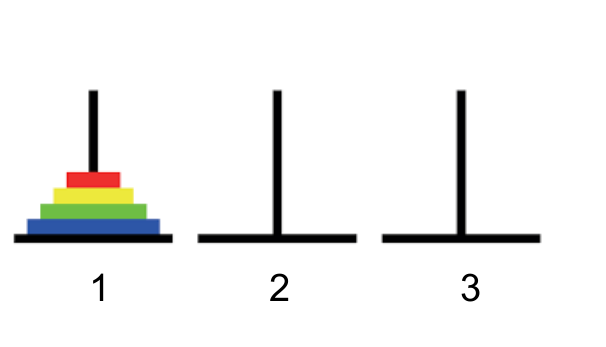

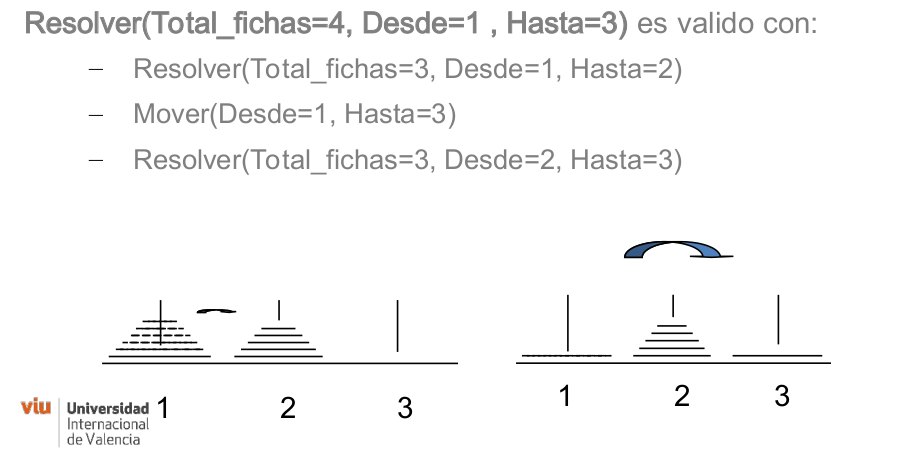

In [ ]:
#Torres de Hanoi - Divide y venceras
################################################################################


################################################################
def Resolver(N, desde, hasta):
  # N - Nº de fichas
  # desde - torre inicial
  # hasta - torre final
  if N==1 :
    print("Lleva la ficha desde " + str(desde) + " hasta " + str(hasta))
    # Caso base (Condición de parada)

  else:
    """
    Aquí esta el corazon del algoritmo. Caso recursivo (divide y vencerás).
    Las torres son: 1+2+3 = 6
    Si: desde = 1 y hasta = 3
    Entonces la torre auxiliar es: 6-1-3 = 2

    """
    Resolver(N-1, desde, 6-desde-hasta)
    print("Lleva la ficha desde " + str(desde) + " hasta " + str(hasta))
    Resolver(N-1, 6-desde-hasta,  hasta)

Resolver(5, 1, 3)
""" Fichas : 5
    Desde  : Torre inicial (Torre 1)
    Hasta  : Torre final (Torre 3)
"""
################################################################

Lleva la ficha desde 1 hasta 3
Lleva la ficha desde 1 hasta 2
Lleva la ficha desde 3 hasta 2
Lleva la ficha desde 1 hasta 3
Lleva la ficha desde 2 hasta 1
Lleva la ficha desde 2 hasta 3
Lleva la ficha desde 1 hasta 3
Lleva la ficha desde 1 hasta 2
Lleva la ficha desde 3 hasta 2
Lleva la ficha desde 3 hasta 1
Lleva la ficha desde 2 hasta 1
Lleva la ficha desde 3 hasta 2
Lleva la ficha desde 1 hasta 3
Lleva la ficha desde 1 hasta 2
Lleva la ficha desde 3 hasta 2
Lleva la ficha desde 1 hasta 3
Lleva la ficha desde 2 hasta 1
Lleva la ficha desde 2 hasta 3
Lleva la ficha desde 1 hasta 3
Lleva la ficha desde 2 hasta 1
Lleva la ficha desde 3 hasta 2
Lleva la ficha desde 3 hasta 1
Lleva la ficha desde 2 hasta 1
Lleva la ficha desde 2 hasta 3
Lleva la ficha desde 1 hasta 3
Lleva la ficha desde 1 hasta 2
Lleva la ficha desde 3 hasta 2
Lleva la ficha desde 1 hasta 3
Lleva la ficha desde 2 hasta 1
Lleva la ficha desde 2 hasta 3
Lleva la ficha desde 1 hasta 3


' Fichas : 5\n    Desde  : Torre inicial (Torre 1)\n    Hasta  : Torre final (Torre 3)\n'

#Cambio de monedas - Técnica voraz

Dado:
- Una cantidad objetivo (**CANTIDAD**)
- Un sistema de monedas(**SISTEMA**)

Se busca:
- Representar la cantidad usando el menor número posible de monedas.

La estrategia voraz consiste en:
> En cada paso, elegir la moneda de mayor valor posible sin exceder la cantidad restante.<br>

**Importante:**<br>
- La técnica voraz *no siempre garantiza solución óptima*, depende del sistema de monedas.
- Funciona perfectamente en *sistemas canónicos* (Ej: monedas reales: 50, 20, 10, 5, 1).

In [ ]:
#Cambio de monedas - Técnica voraz
################################################################################
SISTEMA = [20, 5, 1, 50]
################################################################
def cambio_monedas(CANTIDAD,SISTEMA):
# CANTIDAD - Cantidad total a devolver.
# SISTEMA  - Lista de valores de monedas.

  # Inicialización de estructuras
  SOLUCION = [0]*len(SISTEMA)   # Número de monedas del valor SISTEMA[i]
  ValorAcumulado = 0            # Suma total lograda hasta el momento

  # Recorre las monedas de mayor a menor valor
  for i,valor in enumerate(SISTEMA):
    # Calcula cuántas monedas del valor actual caben sin pasarse. Usa división entera //
    monedas = (CANTIDAD-ValorAcumulado)//valor
    SOLUCION[i] = monedas    # Actualización de la solución parcial
    ValorAcumulado = ValorAcumulado + monedas*valor

    # Condición de parada anticipada. Si se alcanzó la cantidad exacta, se termina.
    if CANTIDAD == ValorAcumulado:
      return SOLUCION

  print("No es posible encontrar solucion")
cambio_monedas(15,SISTEMA)


################################################################

[0, 3, 0, 0]

In [ ]:
# Es fundamental ordenar para que el algoritmo voraz funcione correctamente
SISTEMA.sort(reverse=True)
print(SISTEMA)

[50, 20, 5, 1]


#N Reinas - Vuelta Atrás(Backtracking)
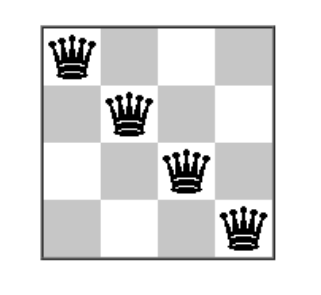

### **El problema de N reinas consiste en:**
> Colocar N reinas en un tablero de ajedrez de tamaño **NxN**, de manera que **ninguna reina ataque a otra**.
#### **Restricciones del ataque**
Una reina ataca si comparte:
- la misma fila
- La misma columna
- La misma diagonal<br>

✔ Es un problema clasico de satisfacción de restricciones y un ejemplo paradigmático de búsqueda con vuelta atrás.

Este problema es un excelente candidato para Backtracking:
- Tiene un espacio de busqueda exponencial.
- No se puede resolver eficientemente con técnicas voraces.
- Requiere explorar combinaciones, pero descartando temprano las que no pueden llegar a una solución valida.

✔ Backtracking permite:
- Construir soluciones parciales.
- Verificar si son prometedoreas.
- Retroceder cuando una solución viola restricciones.

In [ ]:
#N Reinas - Vuelta Atrás()
################################################################################

#Verifica que en la solución parcial no hay amenzas entre reinas
################################################################
def es_prometedora(SOLUCION,etapa):
# es_prometedora actúa como función de poda, permitiendo:
# . Eliminar ramas completas del árbol de busqueda.
# . Reducir drasticamnete el número de configuraciones exploradas
################################################################
  #print(SOLUCION)
  #Si la solución tiene dos valores iguales no es valida => Dos reinas en la misma fila

  # Esta función verifica si una solución hasta la columna "etapa" cumple las restricciones.
  for i in range(etapa+1):
    #print("El valor " + str(SOLUCION[i]) + " está " +  str(SOLUCION.count(SOLUCION[i])) + " veces")

    # verificación de filas:
    # Evita que dos reinas estén en la misma fila
    # Garantiza unicidad de filas en la solución parcial
    if SOLUCION.count(SOLUCION[i]) > 1:
      return False

    #Verifica las diagonales
    for j in range(i+1, etapa +1 ):
      #print("Comprobando diagonal de " + str(i) + " y " + str(j))

      # Dos posiciones están en la misma diagonal si:
      # ∣col1​−col2​∣=∣fila1​−fila2​∣
      # detecta conflictos diagonales
      # Se aplica solo a reinas ya colocadas
      if abs(i-j) == abs(SOLUCION[i]-SOLUCION[j]) : return False
  return True

#Traduce la solución al tablero
################################################################
def escribe_solucion(S):
################################################################
  n = len(S)
  for x in range(n):
    print("")
    for i in range(n):
      if S[i] == x+1:
        print(" X " , end="")
      else:
        print(" - ", end="")



# Proceso principal de N-Reinas
# Esta función implementa el Backtracking recursivo.
################################################################
def reinas(N, solucion=[],etapa=0):
################################################################
### ....
  if len(solucion) == 0:         # [0,0,0...]
    solucion = [0 for i in range(N)]
    # Se crea un vector de tamaño N
    # Cada posición representa una columna
    # El valor 0 indica "sin reina colocada"

  for i in range(1, N+1):
    solucion[etapa] = i
    # En la columna "etapa", se intenta colocar la reina en cada fila posible.

    if es_prometedora(solucion, etapa):
    # Si la solución parcial es válida, se continúa.
    # Si no lo es, se descarta inmediatamente (poda)

      if etapa == N-1:
        print(solucion)
        # Caso base:
        # Se ha colocado una reina en cada columna
        # Se ha encontrado una solución valida completa

      else:
        reinas(N, solucion, etapa+1)
        # Se avanza a la siguiente columna
        # Se profundiza en el árbol de busqueda
    else:
      None

  solucion[etapa] = 0
  # Esto representa el retroceso:
  # . Se elimina la decisión actual
  # . Se prueban alternativas

reinas(5,solucion=[],etapa=0)

[1, 3, 5, 2, 4]
[1, 4, 2, 5, 3]
[2, 4, 1, 3, 5]
[2, 5, 3, 1, 4]
[3, 1, 4, 2, 5]
[3, 5, 2, 4, 1]
[4, 1, 3, 5, 2]
[4, 2, 5, 3, 1]
[5, 2, 4, 1, 3]
[5, 3, 1, 4, 2]


#### `escribe_solucion`
Esta función:
- Traduce la solución vectorial a un **tablero NxN**
- Marca con `"X"` las posiciones de la reinas

In [ ]:
escribe_solucion([1, 5, 8, 6, 3, 7, 2, 4])


 X  -  -  -  -  -  -  - 
 -  -  -  -  -  -  X  - 
 -  -  -  -  X  -  -  - 
 -  -  -  -  -  -  -  X 
 -  X  -  -  -  -  -  - 
 -  -  -  X  -  -  -  - 
 -  -  -  -  -  X  -  - 
 -  -  X  -  -  -  -  - 

# Encontrar los dos puntos mas cercanos

El problema de los *dos puntos más cercanos* consiste en determinar, dado un conjunto finito de puntos en un espacio métrico, cuál es el par de puntos cuya distancia mutua es mínima.

Este problema es fundamental en el área de Algoritmos de Optimización y Geometría Computacional, ya que aparece en aplicaciones como análisis de datos, visión por computador, clustering, sistemas de información geográfica y detección de patrones espaciales.


## Definición

Sea un conjunto de puntos:

P = {p₁, p₂, ..., pₙ}

donde cada punto pertenece a un espacio d-dimensional (d = 1, 2 o 3).

El objetivo es encontrar dos puntos distintos pᵢ y pⱼ, tales que:

dist(pᵢ, pⱼ) = min { dist(pₖ, pₗ) | pₖ, pₗ ∈ P, k ≠ l }

donde dist(·,·) representa una función de distancia válida en el espacio considerado.


## Función de distancia

La función de distancia depende de la dimensión del espacio:

- En 1D (recta numérica):
  
  dist(a, b) = |a − b|

- En 2D (plano cartesiano):
  
  dist((x₁, y₁), (x₂, y₂)) = √((x₁ − x₂)² + (y₁ − y₂)²)

- En 3D (espacio tridimensional):
  
  dist((x₁, y₁, z₁), (x₂, y₂, z₂)) = √((x₁ − x₂)² + (y₁ − y₂)² + (z₁ − z₂)²)


## Entrada, salida y criterio de optimalidad

**Entrada:**
- Un conjunto de n puntos representados como números (1D), pares ordenados (2D) o ternas (3D).

**Salida:**
- El par de puntos cuya distancia es mínima.
- El valor de dicha distancia mínima.

**Criterio de optimalidad:**
- Minimizar la distancia entre dos puntos distintos del conjunto.


## Clasificación del problema

Este problema se clasifica como:

- Un problema de optimización.
- Un problema de búsqueda en espacios geométricos.
- Un problema abordable mediante fuerza bruta y técnicas avanzadas como Divide y Vencerás.
- Un caso clásico de estudio para análisis de complejidad algorítmica.

El interés principal radica en reducir el costo computacional sin perder correctitud.


In [ ]:
# 1: Planteamiento del problema
# Representación básica de conjuntos de puntos

# Ejemplo en 1D
puntos_1d = [3403, 4537, 9089, 9746, 7259]

# Ejemplo en 2D
puntos_2d = [(1122, 6175), (135, 4076), (7296, 2741)]

# Ejemplo en 3D
puntos_3d = [(1, 4, 7), (2, 5, 9), (10, 3, 6)]

print("Puntos en 1D:", puntos_1d)
print("Puntos en 2D:", puntos_2d)
print("Puntos en 3D:", puntos_3d)


Puntos en 1D: [3403, 4537, 9089, 9746, 7259]
Puntos en 2D: [(1122, 6175), (135, 4076), (7296, 2741)]
Puntos en 3D: [(1, 4, 7), (2, 5, 9), (10, 3, 6)]


## Representación del problema en una dimensión (1D)

Para facilitar la comprensión inicial del problema de los dos puntos más cercanos, se comienza analizando el caso unidimensional (1D).

En este escenario, los puntos se encuentran ubicados sobre una recta numérica y se representan simplemente como valores numéricos. El objetivo es identificar el par de números cuya distancia absoluta es mínima.


## Interpretación geométrica

En una dimensión, cada punto corresponde a una posición sobre una recta real. La distancia entre dos puntos se mide como la diferencia absoluta entre sus valores.

Desde un punto de vista geométrico, el problema consiste en encontrar los dos puntos más próximos entre sí sobre la recta, es decir, aquellos cuya separación es mínima.


## Distancia en 1D

En el caso unidimensional, la distancia entre dos puntos a y b se define como:

dist(a, b) = |a − b|

Esta definición cumple las propiedades de una métrica: no negatividad, identidad, simetría y desigualdad triangular.


## Reformulación del problema en 1D

Dado un conjunto de números reales o enteros:

P = {x₁, x₂, ..., xₙ}

el problema consiste en encontrar dos valores distintos xᵢ y xⱼ tales que:

|xᵢ − xⱼ| sea mínimo para todo i ≠ j.


## Observaciones iniciales

- El orden de los puntos en la lista original no aporta información directa sobre la distancia mínima.
- El problema puede resolverse comparando todas las parejas posibles.
- Este caso servirá como base para analizar la eficiencia de diferentes estrategias algorítmicas.

A partir de esta representación, se abordará primero una solución mediante fuerza bruta.


In [ ]:
# 1.1: Representación del problema en 1D

# Conjunto de puntos en una dimensión
# puntos_1d = [3403, 4537, 9089, 9746, 7259]

# Visualización básica del conjunto de puntos
print("Conjunto de puntos en 1D:")
print(puntos_1d)

# Nota:
# Cada valor representa la posición de un punto sobre la recta numérica.
# El objetivo será encontrar el par de puntos con menor distancia absoluta.


Conjunto de puntos en 1D:
[3403, 4537, 9089, 9746, 7259]


## Primer intento: Fuerza bruta

El primer enfoque natural para resolver el problema de los dos puntos más cercanos en 1D es utilizar una estrategia de fuerza bruta.

Este enfoque consiste en calcular la distancia entre todas las parejas posibles de puntos y seleccionar aquella cuya distancia sea mínima. Aunque es conceptualmente simple y garantiza encontrar la solución correcta, su costo computacional puede ser elevado para conjuntos grandes de datos.


## Descripción del algoritmo

Dado un conjunto de n puntos en una dimensión:

1. Se consideran todas las parejas posibles de puntos (xᵢ, xⱼ), con i < j.
2. Para cada pareja se calcula la distancia absoluta |xᵢ − xⱼ|.
3. Se mantiene la distancia mínima encontrada hasta el momento.
4. Al finalizar, se devuelve el par de puntos con menor distancia.

Este algoritmo explora exhaustivamente el espacio de soluciones.


## Correctitud del algoritmo

El algoritmo de fuerza bruta es correcto porque evalúa todas las posibles combinaciones de dos puntos del conjunto.

Al comparar todas las distancias posibles, se garantiza que el par seleccionado al final es aquel con la distancia mínima, cumpliendo el criterio de optimalidad del problema.


## Análisis preliminar de complejidad

Para un conjunto de n puntos, el número de parejas distintas es:

n(n − 1) / 2

Por lo tanto, el número de comparaciones crece cuadráticamente con respecto a **n**, lo que anticipa una complejidad temporal de orden O(n²).

Este análisis motiva la búsqueda de algoritmos más eficientes.


In [ ]:
# 1.2: Fuerza bruta en 1D

# puntos_1d = [3403, 4537, 9089, 9746, 7259]

# Inicialización
distancia_minima = float("inf")
par_mas_cercano = None

# Algoritmo de fuerza bruta
n = len(puntos_1d)
for i in range(n):
    for j in range(i + 1, n):
        distancia = abs(puntos_1d[i] - puntos_1d[j])
        if distancia < distancia_minima:
            distancia_minima = distancia
            par_mas_cercano = (puntos_1d[i], puntos_1d[j])

print("Puntos en 1D:", puntos_1d)
print("Par de puntos más cercano:", par_mas_cercano)
print("Distancia mínima:", distancia_minima)


Puntos en 1D: [3403, 4537, 9089, 9746, 7259]
Par de puntos más cercano: (9089, 9746)
Distancia mínima: 657


## Interpretación del resultado

El algoritmo de fuerza bruta identifica correctamente el par de puntos con menor distancia en el conjunto dado.

Sin embargo, el número de comparaciones crece rápidamente a medida que aumenta el número de puntos, lo que hace que este enfoque sea poco eficiente para grandes volúmenes de datos.

En el siguiente punto se analizará formalmente la complejidad del algoritmo y se discutirá la posibilidad de mejorarla.


## Conteo de operaciones del algoritmo de fuerza bruta

En el algoritmo de fuerza bruta, se comparan todas las parejas posibles de puntos del conjunto.

Si el número de puntos es n, el número total de comparaciones realizadas es:

n(n − 1) / 2

Cada comparación implica:
- Una resta
- Un valor absoluto
- Una comparación con la distancia mínima actual

Por lo tanto, el número de operaciones crece proporcionalmente al número de parejas evaluadas.


## Complejidad temporal

El número de comparaciones del algoritmo es proporcional a n².

Por lo tanto, la complejidad temporal del algoritmo de fuerza bruta para el problema de los dos puntos más cercanos en 1D es:

O(n²)

Este crecimiento cuadrático hace que el algoritmo sea ineficiente cuando el número de puntos es grande.


## Complejidad espacial

El algoritmo utiliza una cantidad constante de memoria adicional para almacenar:

- La distancia mínima encontrada
- El par de puntos más cercano

No se emplean estructuras auxiliares dependientes del tamaño de la entrada.

Por lo tanto, la complejidad espacial es:

O(1)


## Evaluación de escalabilidad

Aunque el algoritmo de fuerza bruta es correcto y sencillo de implementar, su escalabilidad es limitada.

Por ejemplo:
- Si n = 1.000, se realizan aproximadamente 500.000 comparaciones.
- Si n = 10.000, se realizan aproximadamente 50 millones de comparaciones.

Esto demuestra que el enfoque no es adecuado para conjuntos de datos grandes.


## ¿Se puede mejorar el algoritmo?

Sí, el algoritmo puede mejorarse.

La principal debilidad del enfoque de fuerza bruta es que:
- No aprovecha ninguna estructura del problema.
- Repite comparaciones innecesarias.

Dado que los puntos están en una dimensión, es posible:
- Ordenar los puntos.
- Reducir el número de comparaciones.
- Aplicar el paradigma Divide y Vencerás.

Estas ideas permiten diseñar un algoritmo más eficiente, reduciendo la complejidad temporal.


## Segundo intento: Divide y Vencerás

Tras analizar el algoritmo de fuerza bruta, se observa que su principal desventaja es el elevado número de comparaciones innecesarias.

El paradigma Divide y Vencerás permite reducir este costo dividiendo el problema original en subproblemas más pequeños, resolviéndolos de forma independiente y combinando sus soluciones de manera eficiente.



## Idea central en una dimensión

En el caso unidimensional, la clave para mejorar el algoritmo es ordenar previamente los puntos.

Una vez ordenados:
- Los puntos más cercanos entre sí deben aparecer como elementos consecutivos en la lista ordenada.
- No es necesario comparar todas las parejas posibles.
- Basta con comparar puntos adyacentes.


## Relación con el paradigma Divide y Vencerás

El algoritmo se estructura en tres fases:

1. **Dividir**: Separar el conjunto de puntos en dos mitades.
2. **Vencer**: Encontrar recursivamente el par más cercano en cada mitad.
3. **Combinar**: Comparar las soluciones parciales para obtener la solución global.

En una dimensión, la fase de combinación es especialmente eficiente debido al ordenamiento previo de los puntos.


## Intuición geométrica

Sobre una recta numérica, los puntos más cercanos necesariamente se encuentran uno al lado del otro cuando los puntos están ordenados.

Esto significa que el problema puede resolverse sin necesidad de comparar puntos lejanos entre sí, reduciendo drásticamente el número de comparaciones.


## Ventaja esperada

Al aplicar Divide y Vencerás junto con el ordenamiento de los puntos, se espera reducir la complejidad temporal del algoritmo desde O(n²) hasta O(n log n).

Esta mejora hace que el algoritmo sea escalable y adecuado para conjuntos de datos grandes.


In [ ]:
# 2.1: Idea algorítmica Divide y Vencerás en 1D

# puntos_1d = [3403, 4537, 9089, 9746, 7259]

# Ordenamiento de los puntos
puntos_ordenados = sorted(puntos_1d)

print("Puntos originales en 1D:", puntos_1d)
print("Puntos ordenados en 1D:", puntos_ordenados)

# Observación:
# En la lista ordenada, los puntos más cercanos deben ser consecutivos.


Puntos originales en 1D: [3403, 4537, 9089, 9746, 7259]
Puntos ordenados en 1D: [3403, 4537, 7259, 9089, 9746]


## Preparación para el siguiente paso

Una vez comprendida la idea algorítmica de Divide y Vencerás en 1D, el siguiente paso será diseñar formalmente el algoritmo, definiendo:

- El caso base
- El paso recursivo
- El proceso de combinación

Esto permitirá implementar el algoritmo completo y analizar su complejidad.


## Definición del problema

Dado un conjunto de puntos sobre una recta numérica (1D), se desea encontrar el par de puntos cuya distancia absoluta sea mínima.

La distancia entre dos puntos x₁ y x₂ se define como:

|x₁ − x₂|


## Estrategia del algoritmo Divide y Vencerás en 1D

El algoritmo se estructura de la siguiente manera:

1. Ordenar los puntos.
2. Dividir el conjunto en dos mitades.
3. Resolver recursivamente cada mitad.
4. Combinar las soluciones comparando únicamente los puntos adyacentes.

En una dimensión, el paso de combinación se simplifica notablemente, ya que los puntos más cercanos deben ser consecutivos en el arreglo ordenado.


## Caso base y paso recursivo

- **Caso base**:  
  Si el conjunto tiene dos puntos, la distancia entre ellos es la solución.

- **Paso recursivo**:  
  Se divide el conjunto en dos partes, se calcula la distancia mínima en cada una y se retorna el mínimo global.

Debido a la naturaleza unidimensional del problema, no es necesario un paso de combinación complejo.


## Corrección del algoritmo

En una dimensión, ordenar los puntos garantiza que el par más cercano aparecerá como elementos consecutivos.

Por lo tanto, comparar únicamente puntos adyacentes es suficiente para encontrar la distancia mínima, sin perder generalidad.


In [ ]:
# 2.2: Algoritmo Divide y Vencerás en 1D

# puntos_1d = [3403, 4537, 9089, 9746, 7259]

def distancia_minima_1d(puntos):
    # Paso 1: ordenar los puntos
    puntos_ordenados = sorted(puntos)

    # Inicializar la distancia mínima con un valor grande
    distancia_min = float("inf")
    par_mas_cercano = None

    # Paso 2: comparar puntos consecutivos
    for i in range(len(puntos_ordenados) - 1):
        d = abs(puntos_ordenados[i+1] - puntos_ordenados[i])
        if d < distancia_min:
            distancia_min = d
            par_mas_cercano = (puntos_ordenados[i], puntos_ordenados[i+1])

    return distancia_min, par_mas_cercano

# Ejecución del algoritmo
distancia, par = distancia_minima_1d(puntos_1d)

print("Puntos:", puntos_1d)
print("Par más cercano:", par)
print("Distancia mínima:", distancia)


Puntos: [3403, 4537, 9089, 9746, 7259]
Par más cercano: (9089, 9746)
Distancia mínima: 657


## Análisis de complejidad

- Ordenar los puntos tiene un costo de O(n log n).
- Comparar puntos consecutivos requiere O(n).

Por tanto, la complejidad total del algoritmo es:

O(n log n)

Esto representa una mejora significativa frente al enfoque de fuerza bruta O(n²).


## Conclusión para el caso 1D

El problema del par de puntos más cercanos en una dimensión puede resolverse eficientemente utilizando Divide y Vencerás.

Gracias al ordenamiento previo, el algoritmo evita comparaciones innecesarias y logra una solución óptima con un costo computacional reducido.


# Definición del problema en 2D

Dado un conjunto de puntos en el plano cartesiano, se desea encontrar el par de puntos cuya distancia euclidiana sea mínima.

La distancia entre dos puntos (x₁, y₁) y (x₂, y₂) se define como:

√[(x₁ − x₂)² + (y₁ − y₂)²]


## Diferencias con el caso 1D

A diferencia del caso unidimensional, en 2D no basta con ordenar los puntos y comparar elementos consecutivos.

El par más cercano puede encontrarse:
- En la mitad izquierda
- En la mitad derecha
- Cruzando la frontera entre ambas mitades

Por ello, el paso de combinación es más complejo.


## Estrategia Divide y Vencerás en 2D

El algoritmo sigue los siguientes pasos:

1. Ordenar los puntos según la coordenada x.
2. Dividir el conjunto en dos mitades.
3. Resolver recursivamente cada mitad.
4. Determinar la distancia mínima entre ambas soluciones.
5. Analizar una franja central de ancho 2d para detectar posibles pares más cercanos.

Este enfoque reduce significativamente el número de comparaciones.


## Caso base

Cuando el número de puntos es menor o igual a 3, el problema se resuelve directamente mediante fuerza bruta.

Esto garantiza simplicidad y corrección en los niveles más profundos de la recursión.


In [ ]:
# 2.3: Algoritmo Divide y Vencerás en 2D

import math

# puntos_2d = [(1122, 6175), (135, 4076), (7296, 2741)]

def distancia(p1, p2):
    return math.sqrt((p1[0] - p2[0])**2 + (p1[1] - p2[1])**2)

def fuerza_bruta_2d(puntos):
    min_dist = float("inf")
    par = None
    for i in range(len(puntos)):
        for j in range(i+1, len(puntos)):
            d = distancia(puntos[i], puntos[j])
            if d < min_dist:
                min_dist = d
                par = (puntos[i], puntos[j])
    return min_dist, par

def puntos_mas_cercanos_2d(puntos):
    # Caso base
    if len(puntos) <= 3:
        return fuerza_bruta_2d(puntos)

    # Ordenar por coordenada x
    puntos_ordenados = sorted(puntos, key=lambda x: x[0])
    mitad = len(puntos_ordenados) // 2
    izquierda = puntos_ordenados[:mitad]
    derecha = puntos_ordenados[mitad:]

    # Resolver recursivamente
    dist_izq, par_izq = puntos_mas_cercanos_2d(izquierda)
    dist_der, par_der = puntos_mas_cercanos_2d(derecha)

    # Distancia mínima actual
    d = min(dist_izq, dist_der)
    mejor_par = par_izq if dist_izq < dist_der else par_der

    # Franja central
    x_med = puntos_ordenados[mitad][0]
    franja = [p for p in puntos_ordenados if abs(p[0] - x_med) < d]

    # Comparaciones en la franja
    for i in range(len(franja)):
        for j in range(i+1, len(franja)):
            dist_actual = distancia(franja[i], franja[j])
            if dist_actual < d:
                d = dist_actual
                mejor_par = (franja[i], franja[j])

    return d, mejor_par

# Ejecución del algoritmo
distancia_min, par_cercano = puntos_mas_cercanos_2d(puntos_2d)

print("Puntos en 2D:", puntos_2d)
print("Par más cercano:", par_cercano)
print("Distancia mínima:", distancia_min)


Puntos en 2D: [(1122, 6175), (135, 4076), (7296, 2741)]
Par más cercano: ((1122, 6175), (135, 4076))
Distancia mínima: 2319.4762339804215


## Análisis de complejidad en 2D

- La división del problema genera una recurrencia del tipo:
  
  T(n) = 2T(n/2) + O(n)

- Resolviendo la recurrencia, se obtiene una complejidad de:

O(n log n)

Este costo es muy inferior al algoritmo de fuerza bruta O(n²).


## Conclusión para el caso 2D

El algoritmo Divide y Vencerás permite resolver el problema del par de puntos más cercanos en el plano de manera eficiente.

El uso de una franja central limita las comparaciones necesarias y garantiza la optimalidad del resultado.


# Definición del problema en 3D

Dado un conjunto de puntos en el espacio tridimensional, se desea encontrar el par de puntos cuya distancia euclidiana sea mínima.

La distancia entre dos puntos (x₁, y₁, z₁) y (x₂, y₂, z₂) se define como:

√[(x₁ − x₂)² + (y₁ − y₂)² + (z₁ − z₂)²]


## Relación con el caso 2D

El problema en 3D es una extensión directa del caso 2D.

Los principios del algoritmo se mantienen:
- División del conjunto de puntos
- Resolución recursiva de subproblemas
- Combinación de soluciones parciales

La diferencia principal radica en el cálculo de la distancia y en el análisis de la región central.


## Estrategia Divide y Vencerás en 3D

El algoritmo sigue los siguientes pasos:

1. Ordenar los puntos según una coordenada (por ejemplo, x).
2. Dividir el conjunto en dos mitades.
3. Resolver recursivamente el problema en cada mitad.
4. Obtener la distancia mínima d entre ambas soluciones.
5. Examinar una región central de ancho 2d para detectar pares más cercanos.

Aunque la región central es ahora un volumen, el número de comparaciones sigue siendo acotado.


## Caso base en 3D

Cuando el número de puntos es pequeño (≤ 3), el problema se resuelve mediante fuerza bruta.

Este enfoque garantiza simplicidad y evita sobrecarga innecesaria en niveles profundos de la recursión.


In [ ]:
# Punto 5: Algoritmo Divide y Vencerás en 3D

import math

# puntos_3d = [(1, 4, 7), (2, 5, 9), (10, 3, 6)]

def distancia_3d(p1, p2):
    return math.sqrt(
        (p1[0] - p2[0])**2 +
        (p1[1] - p2[1])**2 +
        (p1[2] - p2[2])**2
    )

def fuerza_bruta_3d(puntos):
    min_dist = float("inf")
    par = None
    for i in range(len(puntos)):
        for j in range(i+1, len(puntos)):
            d = distancia_3d(puntos[i], puntos[j])
            if d < min_dist:
                min_dist = d
                par = (puntos[i], puntos[j])
    return min_dist, par

def puntos_mas_cercanos_3d(puntos):
    # Caso base
    if len(puntos) <= 3:
        return fuerza_bruta_3d(puntos)

    # Ordenar por coordenada x
    puntos_ordenados = sorted(puntos, key=lambda x: x[0])
    mitad = len(puntos_ordenados) // 2
    izquierda = puntos_ordenados[:mitad]
    derecha = puntos_ordenados[mitad:]

    # Resolver recursivamente
    dist_izq, par_izq = puntos_mas_cercanos_3d(izquierda)
    dist_der, par_der = puntos_mas_cercanos_3d(derecha)

    # Distancia mínima actual
    d = min(dist_izq, dist_der)
    mejor_par = par_izq if dist_izq < dist_der else par_der

    # Región central (franja volumétrica)
    x_med = puntos_ordenados[mitad][0]
    franja = [p for p in puntos_ordenados if abs(p[0] - x_med) < d]

    # Comparaciones en la región central
    for i in range(len(franja)):
        for j in range(i+1, len(franja)):
            dist_actual = distancia_3d(franja[i], franja[j])
            if dist_actual < d:
                d = dist_actual
                mejor_par = (franja[i], franja[j])

    return d, mejor_par

# Ejecución del algoritmo
distancia_min_3d, par_cercano_3d = puntos_mas_cercanos_3d(puntos_3d)

print("Puntos en 3D:", puntos_3d)
print("Par más cercano:", par_cercano_3d)
print("Distancia mínima:", distancia_min_3d)


Puntos en 3D: [(1, 4, 7), (2, 5, 9), (10, 3, 6)]
Par más cercano: ((1, 4, 7), (2, 5, 9))
Distancia mínima: 2.449489742783178


## Análisis de complejidad en 3D

La estructura del algoritmo sigue generando la recurrencia:

T(n) = 2T(n/2) + O(n)

Por lo tanto, la complejidad temporal sigue siendo:

O(n log n)

El aumento de dimensionalidad incrementa la constante oculta, pero no cambia el orden de complejidad.


## Conclusión para el caso 3D

El paradigma Divide y Vencerás se adapta naturalmente al espacio tridimensional.

Aunque la geometría del problema se vuelve más compleja, el enfoque sigue siendo eficiente y escalable, manteniendo una complejidad O(n log n).


# Comparación Final: Par de puntos más cercanos en 1D, 2D y 3D
#### Divide y Vencerás

### 1. Naturaleza del problema según la dimensionalidad
#### 1D (Una dimensión)

- Los puntos están sobre una recta numérica.
- La distancia se define como diferencia absoluta.
- El problema tiene una estructura lineal.

#### 2D (Dos dimensiones)

- Los puntos se encuentran en el plano cartesiano.
- La distancia es euclidiana.
- Aparece la posibilidad de que el par más cercano cruce la frontera entre subproblemas.

#### 3D (Tres dimensiones)

- Los puntos se ubican en el espacio tridimensional.
- La distancia euclidiana se extiende a una dimensión adicional.
- El problema se vuelve geométricamente más complejo, pero mantiene la misma estructura algorítmica.

### 2. Estrategia algorítmica utilizada

| Dimensión | Estrategia principal       | Paso crítico       |
| --------- | -------------------------- | ------------------ |
| **1D**    | Ordenar + comparar vecinos | Ordenamiento       |
| **2D**    | Divide y Vencerás          | Franja central     |
| **3D**    | Divide y Vencerás          | Región volumétrica |


## Conclusión: **Encontrar los dos puntos más cercanos**

El problema del par de puntos más cercanos demuestra de forma clara cómo el paradigma `Divide y Vencerás` permite escalar soluciones eficientes a medida que aumenta la dimensionalidad, manteniendo una complejidad óptima de O(n log n).

La diferencia entre 1D, 2D y 3D no está en el orden de complejidad, sino en la sofisticación del razonamiento geométrico necesario para combinar soluciones parciales.

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
#cd /content
#git clone https://github.com/whbello/Algoritmos-de-optimizaci-n.git

!git clone https://github.com/whbello/Algoritmos-de-optimizaci-n.git



Cloning into 'Algoritmos-de-optimizaci-n'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Total 3 (delta 0), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (3/3), done.


In [4]:
!ls /content


Algoritmos-de-optimizaci-n  drive  sample_data


In [5]:
!ls /content/Algoritmos-de-optimizaci-n


README.md


In [14]:

!cp "/content/drive/MyDrive/ColabProyectos/Algoritmos de optimización/Algoritmos AG1(Divide y vencerás,Voraz,Backtracking).ipynb" "/content/Algoritmos-de-optimizaci-n/"




cp: cannot stat '/content/drive/MyDrive/ColabProyectos/Algoritmos de optimización/Algoritmos AG1(Divide y vencerás,Voraz,Backtracking).ipynb': No such file or directory


In [16]:
!ls /content/drive/MyDrive/"Algoritmos de optimización"



'Algoritmos AG1(Divide y vencerás,Voraz,Backtracking).ipynb'   funcion.png
'Algoritmos - AG2.ipynb'				       img
